# EXPLORATORY DATA ANALYSIS

In [269]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [161]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
prev = pd.read_csv("previous_application.csv")   # loading the previous application data 
data = pd.read_csv("application_data.csv")  #loading application data

In [11]:
prev.head(15)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [18]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [19]:
prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [20]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [21]:
data.shape

(307511, 122)

In [22]:
prev.shape

(1670214, 37)

In [29]:
#checking data type of each column
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

# 1.  Finding Missing Value

In [24]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [37]:
# percentage of  missing values in the application_data
result = round((data.isnull().sum() / len(data.index))*100, 2)
result

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [41]:
# Only null values column
Null_col = result[result>0]
Null_col

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
Length: 64, dtype: float64

In [42]:
Null_col.count

<bound method Series.count of AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
Length: 64, dtype: float64>

In [56]:
# Dropping all the columns which has missing value > 50%
Null_col50 = Null_col[Null_col>50]
print("Number of columns with null value > 50% :", len(Null_col50.index))
print(Null_col50)

Number of columns with null value > 50% : 41
OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEA

In [65]:
#dropping all the columns which has missing value more than 15%
Null_col1 = Null_col[Null_col>15]
print("Number of columns with null value > 15% :", len(Null_col1.index))
print(Null_col1)


Number of columns with null value > 15% : 51
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOOR

In [70]:
#List of columns > 15%
Null_col1.index

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

we now have variables where the percentage share of missing values by columns are more than 15%.

In [114]:
# Dropping all the columns which has missing value < 15%
Null_col2 = Null_col[Null_col<15]
print("Number of columns with null value < 15% :", len(Null_col2.index))
print(Null_col2)

Number of columns with null value < 15% : 13
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


In [115]:
#List of columns < 15%
Null_col2.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

we now have variables where the percentage share of missing values by columns are less than 15%.

##### Dropping a few more selected columns which are not be important for our analysis.

In [119]:
# List of columns to be dropped as these columns have no significant value for the  our analysis
list_col = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE']

In [130]:
# Dropping the above list columns
data.drop(list_col, axis=1)

In [118]:
data.shape

(307507, 91)

In [122]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0149,"Stone, brick",No,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0714,Block,No,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.2898,"Stone, brick",No,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0214,"Stone, brick",No,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.7970,Panel,No,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0086,"Stone, brick",No,-322.0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0.0718,Panel,No,-787.0,0.0,0.0,0.0,2.0,0.0,1.0


#### #Now finding the categorial columns having XNA values


In [124]:
data['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [125]:
data.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [126]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0149,"Stone, brick",No,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0714,Block,No,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.2898,"Stone, brick",No,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0214,"Stone, brick",No,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.7970,Panel,No,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0086,"Stone, brick",No,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# In CODE_GENDER ['M' 'F' 'XNA'] since XNA values are very low so remove rows which has value XNA
data = data.loc[data['CODE_GENDER'] != 'XNA']

In [128]:
data.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [131]:
data.shape

(307507, 91)

In [140]:
# For Organization column

data[data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 91)

In [139]:
# Describing the organization type column

data['ORGANIZATION_TYPE'].describe()

count                     307507
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In column 'ORGANIZATION_TYPE', 55374 rows are having 'XNA' values. Which means 18% of the column of total is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [142]:
# Dropping the rows of total 55374 have 'XNA' values in the organization type column

data=data.drop(data.loc[data['ORGANIZATION_TYPE']=='XNA'].index)
data[data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 91)

In [143]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

data[numeric_columns]=data[numeric_columns].apply(pd.to_numeric)
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0149,"Stone, brick",No,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0714,Block,No,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Converting Age and Days columns values from negative to positive 

In [147]:
data.DAYS_BIRTH = data.DAYS_BIRTH.abs()
data.DAYS_EMPLOYED = data.DAYS_EMPLOYED.abs()
data.DAYS_REGISTRATION = data.DAYS_REGISTRATION.abs()
data.DAYS_LAST_PHONE_CHANGE = data.DAYS_LAST_PHONE_CHANGE.abs()

In [148]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0149,"Stone, brick",No,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0714,Block,No,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
data.tail(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307499,456243,0,Cash loans,F,N,Y,0,81000.0,225000.0,12694.5,...,NaN,NaN,NaN,1511.0,0.0,0.0,0.0,1.0,1.0,0.0
307500,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,...,0.0890,Panel,No,1459.0,0.0,0.0,0.0,1.0,0.0,5.0
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,0.0149,"Stone, brick",No,448.0,NaN,NaN,NaN,NaN,NaN,NaN
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,...,NaN,NaN,NaN,1516.0,0.0,0.0,0.0,0.0,0.0,1.0
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,NaN,NaN,NaN,2315.0,0.0,0.0,0.0,1.0,0.0,2.0
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.2898,"Stone, brick",No,273.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.7970,Panel,No,1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0086,"Stone, brick",No,322.0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0.0718,Panel,No,787.0,0.0,0.0,0.0,2.0,0.0,1.0


# 2. outliers

In our analysis to find the outliers, we have considered few numerical column and analyzed their statistics 
but before that we will convert the scientific sysmbols to flaot value

In [150]:
# To suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

In [153]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,...,0.01490,"Stone, brick",No,1134.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,...,0.07140,Block,No,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,...,NaN,NaN,NaN,815.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,...,NaN,NaN,NaN,617.00000,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,...,NaN,NaN,NaN,1106.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [157]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252133.00000,252133.00000,252133.00000,252133.00000,252133.00000,252121.00000,251877.00000,252133.00000,252133.00000,252133.00000,...,77375.00000,113635.00000,131081.00000,252132.00000,218277.00000,218277.00000,218277.00000,218277.00000,218277.00000,218277.00000
mean,278115.87227,0.08660,0.49851,175913.89889,611401.82126,27812.44961,549407.69348,0.02089,14769.15234,2384.14225,...,0.00875,0.02866,0.10330,971.04087,0.00659,0.00698,0.03407,0.28199,0.25981,1.85625
std,102815.58484,0.28125,0.76316,258853.57896,406529.36775,14647.82952,373269.48663,0.01387,3662.56267,2338.32767,...,0.04784,0.07129,0.10867,827.30895,0.08509,0.11102,0.20283,0.94836,0.82368,1.82628
min,100002.00000,0.00000,0.00000,25650.00000,45000.00000,1980.00000,40500.00000,0.00029,7489.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189036.00000,0.00000,0.00000,112500.00000,277969.50000,17073.00000,247500.00000,0.01001,11775.00000,767.00000,...,0.00000,0.00000,0.04140,288.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,278065.00000,0.00000,0.00000,157500.00000,521280.00000,25834.50000,450000.00000,0.01885,14573.00000,1648.00000,...,0.00000,0.00310,0.06890,763.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,367166.00000,0.00000,1.00000,211500.00000,829224.00000,35617.50000,693000.00000,0.02866,17563.00000,3175.00000,...,0.00390,0.02710,0.12860,1578.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
max,456255.00000,1.00000,19.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,25200.00000,17912.00000,...,1.00000,1.00000,1.00000,4292.00000,4.00000,9.00000,8.00000,27.00000,261.00000,23.00000


In [158]:
round(application_df[['CNT_CHILDREN','AMT_GOODS_PRICE', 'EXT_SOURCE_2','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].describe(), 2)

,CNT_CHILDREN,AMT_GOODS_PRICE,EXT_SOURCE_2,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,307511.00000,307233.00000,306851.00000,307511.00000,307511.00000,307499.00000
mean,0.42000,538396.21000,0.51000,168797.92000,599026.00000,27108.57000
std,0.72000,369446.46000,0.19000,237123.15000,402490.78000,14493.74000
min,0.00000,40500.00000,0.00000,25650.00000,45000.00000,1615.50000
25%,0.00000,238500.00000,0.39000,112500.00000,270000.00000,16524.00000
50%,0.00000,450000.00000,0.57000,147150.00000,513531.00000,24903.00000
75%,1.00000,679500.00000,0.66000,202500.00000,808650.00000,34596.00000
max,19.00000,4050000.00000,0.85000,117000000.00000,4050000.00000,258025.50000


We can see the the percentile value of EXT_SOURCE_2 is gradually increasing and  thus we can tell that there is no outliers
like that in the AMT_GOODS_PRICE variable. Therefore, we can impute the missing values of the EXT_SOURCE_2 column with its mean
and we drop the missing value rows of AMT_GOODS_PRICE.

In [168]:
#  we will now impute EXT_SOURCE_2 by its mean value
application_df.loc[np.isnan(application_df['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = application_df['EXT_SOURCE_2'].mean()

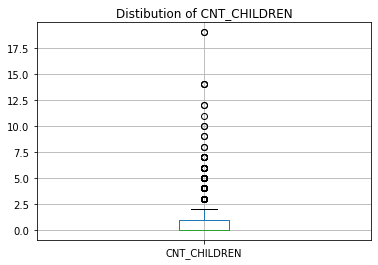

In [184]:
#plotting CNT_CHILDREN to show outliers
ax = application_df.boxplot(column='CNT_CHILDREN')
plt.title('Distibution of CNT_CHILDREN')
plt.show()

Here 1st quartile is missing for CNT_CHILDREN which means most of the data are present in the 1st quartile.

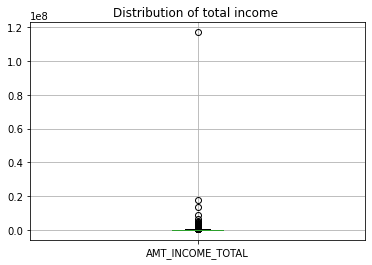

In [183]:
#plotting AMT_INCOME_TOTAL to show outliers
ax = application_df.boxplot(column='AMT_INCOME_TOTAL')
plt.title('Distribution of total income ')
plt.show()

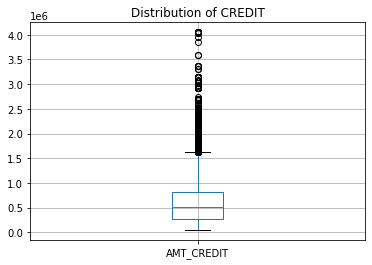

In [181]:
#plotting AMT_CREDIT to show outliers
ax = application_df.boxplot(column='AMT_CREDIT')
plt.title('Distribution of CREDIT')
plt.show()

Here 1st quartiles and 3rd quartile for AMT_CREDIT is stays first quartile.

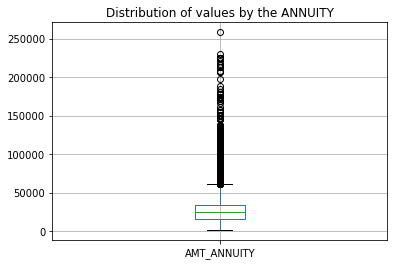

In [182]:
#plotting AMT_ANNUITY to show outliers
ax = application_df.boxplot(column='AMT_ANNUITY')
plt.title('Distribution of values by the ANNUITY')
plt.show()

Here 1st quartiles and 3rd quartile forAMT_ANNUITY is stays first quartile.

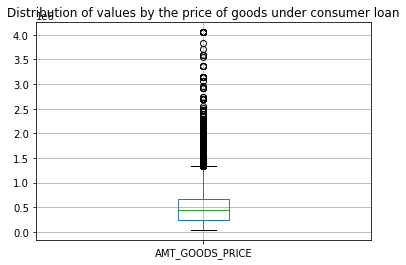

In [178]:
#plotting AMT_GOODS_PRICE to show outliers
ax = application_df.boxplot(column='AMT_GOODS_PRICE')
plt.title('Distribution of values by the price of goods under consumer loan')
plt.show()

Here 1st quartiles and 3rd quartile for AMT_GOODS_PRICE is stays first quartile.

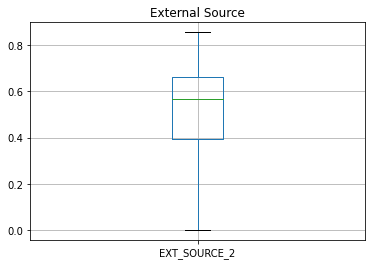

In [175]:
#plotting EXT_SOURCE_2 to show outliers
ax = application_df.boxplot(column='EXT_SOURCE_2')
plt.title('External Source')
plt.show()

From above box plots we found that numeric columns have outliers

# 3.  Derived Metrics

In [203]:
# Binning of AMT_INCOME_TOTAL , AMT_CREDIT, AMT_GOODS_PRICE, DAYS_BIRTH, DAYS_EMPLOYED

# Lets Create bins for income amount in term of Lakhs
data['AMT_INCOME_TOTAL']=data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [188]:
round((data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L       51.55000
2L-3L       22.91000
0-1L        17.34000
3L-4L        5.33000
4L-5L        1.95000
5L-6L        0.41000
6L-7L        0.32000
8L-9L        0.11000
7L-8L        0.06000
9L-10L       0.01000
10L Above    0.01000
Name: AMT_INCOME_RANGE, dtype: float64

In [189]:
data.AMT_INCOME_RANGE.head()

0    2L-3L
1    2L-3L
2     0-1L
3    1L-2L
4    1L-2L
Name: AMT_INCOME_RANGE, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L Above']

In [190]:
# Lets Create bins for Price of Goods in term of Lakhs
data['AMT_GOODS_PRICE']=data['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

data['AMT_GOODS_PRICE_RANGE']=pd.cut(data['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [194]:
round((data["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L       19.64000
4L-5L       18.98000
6L-7L       12.84000
10L Above   11.57000
1L-2L       10.43000
8L-9L        7.62000
3L-4L        6.95000
5L-6L        4.12000
7L-8L        2.74000
9L-10L       2.57000
0-1L         2.54000
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [195]:
data.AMT_GOODS_PRICE_RANGE.head()

0        3L-4L
1    10L Above
2        1L-2L
3        2L-3L
4        5L-6L
Name: AMT_GOODS_PRICE_RANGE, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L Above']

In [196]:
# Lets Create bins for Ccredits in term of Lakhs
data['AMT_CREDIT']=data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

data['AMT_CREDIT']=pd.cut(data['AMT_CREDIT'],bins=bins,labels=slots)

In [197]:
round((data["AMT_CREDIT"].value_counts(normalize = True)*100),2)

10L Above   17.11000
2L-3L       16.84000
5L-6L       11.07000
4L-5L       10.75000
1L-2L        9.56000
3L-4L        8.68000
6L-7L        7.82000
8L-9L        7.35000
7L-8L        6.12000
9L-10L       3.00000
0-1L         1.69000
Name: AMT_CREDIT, dtype: float64

In [198]:
data.AMT_CREDIT.head()

0        4L-5L
1    10L Above
2        1L-2L
3        3L-4L
4        5L-6L
Name: AMT_CREDIT, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L Above']

In [202]:
# creating "days_col" varibale to store all days columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED"]

data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,252133.00000,252133.00000
mean,14769.15234,2384.14225
std,3662.56267,2338.32767
min,7489.00000,0.00000
25%,11775.00000,767.00000
50%,14573.00000,1648.00000
75%,17563.00000,3175.00000
max,25200.00000,17912.00000


In [204]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_GOODS_PRICE_RANGE
0,100002,1,Cash loans,M,N,Y,0,0.00000,4L-5L,24700.50000,...,No,1134.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0-1L,3L-4L
1,100003,0,Cash loans,F,N,N,0,0.00000,10L Above,35698.50000,...,No,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0-1L,10L Above
2,100004,0,Revolving loans,M,Y,Y,0,0.00000,1L-2L,6750.00000,...,NaN,815.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0-1L,1L-2L
3,100006,0,Cash loans,F,N,Y,0,0.00000,3L-4L,29686.50000,...,NaN,617.00000,NaN,NaN,NaN,NaN,NaN,NaN,0-1L,2L-3L
4,100007,0,Cash loans,M,N,Y,0,0.00000,5L-6L,21865.50000,...,NaN,1106.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0-1L,5L-6L


In [206]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252133.00000,252133.00000,252133.00000,252133.00000,252121.00000,251877.00000,252133.00000,252133.00000,252133.00000,252133.00000,...,77375.00000,113635.00000,131081.00000,252132.00000,218277.00000,218277.00000,218277.00000,218277.00000,218277.00000,218277.00000
mean,278115.87227,0.08660,0.49851,0.00000,27812.44961,5.49408,0.02089,14769.15234,2384.14225,4635.43876,...,0.00875,0.02866,0.10330,971.04087,0.00659,0.00698,0.03407,0.28199,0.25981,1.85625
std,102815.58484,0.28125,0.76316,0.00000,14647.82952,3.73269,0.01387,3662.56267,2338.32767,3252.16149,...,0.04784,0.07129,0.10867,827.30895,0.08509,0.11102,0.20283,0.94836,0.82368,1.82628
min,100002.00000,0.00000,0.00000,0.00000,1980.00000,0.40500,0.00029,7489.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189036.00000,0.00000,0.00000,0.00000,17073.00000,2.47500,0.01001,11775.00000,767.00000,1845.00000,...,0.00000,0.00000,0.04140,288.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,278065.00000,0.00000,0.00000,0.00000,25834.50000,4.50000,0.01885,14573.00000,1648.00000,4265.00000,...,0.00000,0.00310,0.06890,763.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,367166.00000,0.00000,1.00000,0.00000,35617.50000,6.93000,0.02866,17563.00000,3175.00000,6952.00000,...,0.00390,0.02710,0.12860,1578.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
max,456255.00000,1.00000,19.00000,0.00000,258025.50000,40.50000,0.07251,25200.00000,17912.00000,22928.00000,...,1.00000,1.00000,1.00000,4292.00000,4.00000,9.00000,8.00000,27.00000,261.00000,23.00000


# 4.Imbalance in the Target variable column

 The ratio of the applicants with no payment difficulties (Target = 0) and with payment difficulties (Target = 1)


In [207]:
100*data['TARGET'].value_counts(normalize = True)

0   91.33989
1    8.66011
Name: TARGET, dtype: float64

In [232]:
Target0 = data.loc[data.TARGET == 0]
Target1 = data.loc[data.TARGET == 1]


While we are working with the dataset based on Target variable, we can clearly see the imbalance between target type 1 and 0 Ratio of imbalance is 91.98 : 8.02

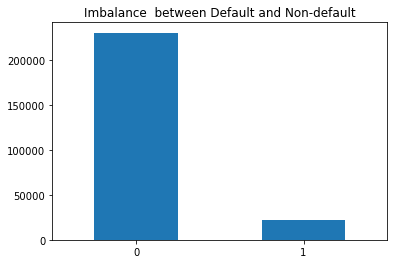

In [214]:
# Graphical analysis of the share
data['TARGET'].value_counts().plot(kind='bar')
plt.title('Imbalance  between Default and Non-default')
plt.xticks(rotation = 0)
plt.show()

As we can see there is a large imbalance between the proportion of default (TARGET = 1) and non-default (TARGET = 0) in the dataset. 
The ratio of non-deafult to default is 11.4:1. Even if the default ratio is low, default of any application is costly and 
should be analyzed closely.

Hence we should dvide the dataset into two subsets based on Target variable. i.e. Target=0 and Target=1

In [217]:
#creating dataframe with TARGET = 1 (payment defaulted)
target_default = data.loc[data['TARGET'] == 1]
print(target_default.shape)
display(target_default.head())

(21835, 93)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_GOODS_PRICE_RANGE
0,100002,1,Cash loans,M,N,Y,0,0.00000,4L-5L,24700.50000,...,No,1134.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0-1L,3L-4L
26,100031,1,Cash loans,F,N,Y,0,0.00000,9L-10L,27076.50000,...,Yes,161.00000,0.00000,0.00000,0.00000,0.00000,2.00000,2.00000,0-1L,7L-8L
40,100047,1,Cash loans,M,N,Y,0,0.00000,10L Above,35028.00000,...,No,1075.00000,0.00000,0.00000,0.00000,2.00000,0.00000,4.00000,0-1L,8L-9L
42,100049,1,Cash loans,F,N,N,0,0.00000,2L-3L,16258.50000,...,NaN,1480.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0-1L,2L-3L
94,100112,1,Cash loans,M,Y,Y,0,0.00000,9L-10L,64107.00000,...,NaN,591.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0-1L,8L-9L


In [218]:
#creating dataframe with TARGET = 0 (payment not defaulted)
target_nondefault = data.loc[data['TARGET'] == 0]
print(target_nondefault.shape)
display(target_nondefault.head())

(230298, 93)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_GOODS_PRICE_RANGE
1,100003,0,Cash loans,F,N,N,0,0.00000,10L Above,35698.50000,...,No,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0-1L,10L Above
2,100004,0,Revolving loans,M,Y,Y,0,0.00000,1L-2L,6750.00000,...,NaN,815.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0-1L,1L-2L
3,100006,0,Cash loans,F,N,Y,0,0.00000,3L-4L,29686.50000,...,NaN,617.00000,NaN,NaN,NaN,NaN,NaN,NaN,0-1L,2L-3L
4,100007,0,Cash loans,M,N,Y,0,0.00000,5L-6L,21865.50000,...,NaN,1106.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0-1L,5L-6L
5,100008,0,Cash loans,M,N,Y,0,0.00000,4L-5L,27517.50000,...,NaN,2536.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0-1L,4L-5L


# 5. Univariate Analysis

In [225]:
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.rcParams["axes.labelsize"] = 8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.titlepad'] = 10

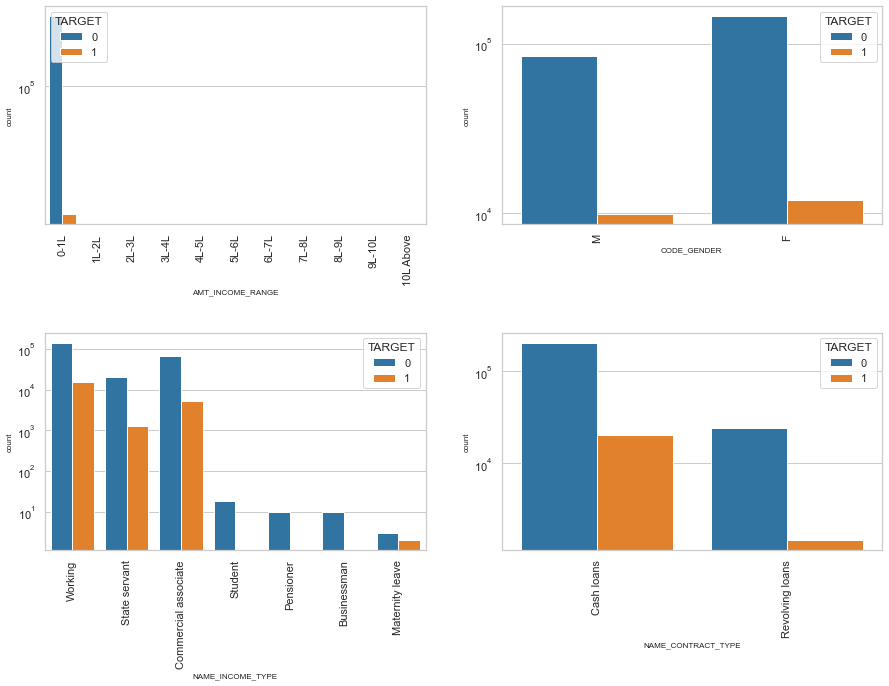

In [227]:
flow = ['AMT_INCOME_RANGE','CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (15, 10))

for i in enumerate(flow):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = data)
    
    plt.rcParams['axes.titlesize'] = 12
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

Observations:

AMT_INCOME_RANGE :

-> People in range 0-1L have high number of loan and also have high in defaulter.
-> Income segment >5L has less defaulter.

CODE_GENDER:

-> The percentage of defaulters are more in Male as compared to Female.

NAME_INCOME_TYPE:

-> Student and business are little higher in percentage of loan repayment.
-> Working, State servent and Commercial associates are higher in default percentage.
-> Maternity category is significantly higher problem in repayment.

NAME_CONTRACT_TYPE

-> In contract type ‘Cash loans’ are high in number of credits than ‘Revolving loans’ contract type.
-> IN above graph 'Revolving loans' is small amount as compared to ‘Cash loans’ 

# 6. Corelation

In [233]:
# Top 10 corelated variables: Target0 dataaframe

corr = Target0.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head()

,Var1,Var2,Correlation
4000,APARTMENTS_MEDI,APARTMENTS_AVG,1.00000
4836,LIVINGAREA_MEDI,LIVINGAREA_AVG,1.00000
4228,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.00000
4304,COMMONAREA_MEDI,COMMONAREA_AVG,1.00000
4380,ELEVATORS_MEDI,ELEVATORS_AVG,1.00000


In [234]:
# Top 10 correlated variables: Target1 dataaframe

corr = Target1.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head()

,Var1,Var2,Correlation
4228,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.00000
4760,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,1.00000
4608,FLOORSMIN_MEDI,FLOORSMIN_AVG,1.00000
4076,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,1.00000
4836,LIVINGAREA_MEDI,LIVINGAREA_AVG,1.00000


Observation:
As we can see from above the corelation analysis we can say that the highest corelation (1.0) is between (ENTRANCES_MEDI with ENTRANCES_AVG)

Previous_Application Dataset

In [235]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,...,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,NaN,607500.00000,THURSDAY,11,...,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,NaN,112500.00000,TUESDAY,11,...,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,NaN,450000.00000,MONDAY,7,...,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,NaN,337500.00000,THURSDAY,9,...,XNA,24.00000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
prev.shape       # Number of rows and columns in previous application data frame

(1670214, 37)

In [237]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [239]:
prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00000,1670214.00000,1297979.00000,1670214.00000,1670213.00000,774370.00000,1284699.00000,1670214.00000,1670214.00000,774370.00000,...,5951.00000,1670214.00000,1670214.00000,1297984.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000
mean,1923089.13533,278357.17410,15955.12066,175233.86036,196114.02122,6697.40214,227847.27928,12.48418,0.99647,0.07964,...,0.77350,-880.67967,313.95112,16.05408,342209.85504,13826.26934,33767.77405,76582.40306,81992.34384,0.33257
std,532597.95870,102814.82385,14782.13733,292779.76239,318574.61655,20921.49541,315396.55794,3.33403,0.05933,0.10782,...,0.10088,779.09967,7127.44346,14.56729,88916.11583,72444.86971,106857.03479,149647.41512,153303.51673,0.47113
min,1000001.00000,100001.00000,0.00000,0.00000,0.00000,-0.90000,0.00000,0.00000,0.00000,-0.00001,...,0.37315,-2922.00000,-1.00000,0.00000,-2922.00000,-2892.00000,-2801.00000,-2889.00000,-2874.00000,0.00000
25%,1461857.25000,189329.00000,6321.78000,18720.00000,24160.50000,0.00000,50841.00000,10.00000,1.00000,0.00000,...,0.71564,-1300.00000,-1.00000,6.00000,365243.00000,-1628.00000,-1242.00000,-1314.00000,-1270.00000,0.00000
50%,1923110.50000,278714.50000,11250.00000,71046.00000,80541.00000,1638.00000,112320.00000,12.00000,1.00000,0.05161,...,0.83510,-581.00000,3.00000,12.00000,365243.00000,-831.00000,-361.00000,-537.00000,-499.00000,0.00000
75%,2384279.75000,367514.00000,20658.42000,180360.00000,216418.50000,7740.00000,234000.00000,15.00000,1.00000,0.10891,...,0.85254,-280.00000,82.00000,24.00000,365243.00000,-411.00000,129.00000,-74.00000,-44.00000,1.00000
max,2845382.00000,456255.00000,418058.14500,6905160.00000,6905160.00000,3060045.00000,6905160.00000,23.00000,1.00000,1.00000,...,1.00000,-1.00000,4000000.00000,84.00000,365243.00000,365243.00000,365243.00000,365243.00000,365243.00000,1.00000


In [240]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [243]:
# percentage of  missing values in the application_data
result2 = round((prev.isnull().sum() / len(prev.index))*100, 2)
result2

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_ANNUITY                   22.29000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00000
AMT_DOWN_PAYMENT              53.64000
AMT_GOODS_PRICE               23.08000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
RATE_DOWN_PAYMENT             53.64000
RATE_INTEREST_PRIMARY         99.64000
RATE_INTEREST_PRIVILEGED      99.64000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_TYPE_SUITE               49.12000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE             

In [245]:
# Only null values column
Null_coll = result2[result2>0]
Null_coll

AMT_ANNUITY                 22.29000
AMT_DOWN_PAYMENT            53.64000
AMT_GOODS_PRICE             23.08000
RATE_DOWN_PAYMENT           53.64000
RATE_INTEREST_PRIMARY       99.64000
RATE_INTEREST_PRIVILEGED    99.64000
NAME_TYPE_SUITE             49.12000
CNT_PAYMENT                 22.29000
PRODUCT_COMBINATION          0.02000
DAYS_FIRST_DRAWING          40.30000
DAYS_FIRST_DUE              40.30000
DAYS_LAST_DUE_1ST_VERSION   40.30000
DAYS_LAST_DUE               40.30000
DAYS_TERMINATION            40.30000
NFLAG_INSURED_ON_APPROVAL   40.30000
dtype: float64

In [246]:
Null_coll.count

<bound method Series.count of AMT_ANNUITY                 22.29000
AMT_DOWN_PAYMENT            53.64000
AMT_GOODS_PRICE             23.08000
RATE_DOWN_PAYMENT           53.64000
RATE_INTEREST_PRIMARY       99.64000
RATE_INTEREST_PRIVILEGED    99.64000
NAME_TYPE_SUITE             49.12000
CNT_PAYMENT                 22.29000
PRODUCT_COMBINATION          0.02000
DAYS_FIRST_DRAWING          40.30000
DAYS_FIRST_DUE              40.30000
DAYS_LAST_DUE_1ST_VERSION   40.30000
DAYS_LAST_DUE               40.30000
DAYS_TERMINATION            40.30000
NFLAG_INSURED_ON_APPROVAL   40.30000
dtype: float64>

In [247]:
# Dropping all the columns which has missing value < 50%
Null_coll50 = Null_coll[Null_coll<50]
print("Number of columns with null value > 50% :", len(Null_coll50.index))
print(Null_coll50)

Number of columns with null value > 50% : 11
AMT_ANNUITY                 22.29000
AMT_GOODS_PRICE             23.08000
NAME_TYPE_SUITE             49.12000
CNT_PAYMENT                 22.29000
PRODUCT_COMBINATION          0.02000
DAYS_FIRST_DRAWING          40.30000
DAYS_FIRST_DUE              40.30000
DAYS_LAST_DUE_1ST_VERSION   40.30000
DAYS_LAST_DUE               40.30000
DAYS_TERMINATION            40.30000
NFLAG_INSURED_ON_APPROVAL   40.30000
dtype: float64


In [253]:
round(prev[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]),2)

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,1297979.00000,1284699.00000,1297984.00000
mean,15955.12000,227847.28000,16.05000
std,14782.14000,315396.56000,14.57000
min,0.00000,0.00000,0.00000
5%,2726.60000,22882.50000,0.00000
25%,6321.78000,50841.00000,6.00000
50%,11250.00000,112320.00000,12.00000
75%,20658.42000,234000.00000,24.00000
90%,34703.82000,585000.00000,36.00000
95%,45336.78000,900000.00000,48.00000


We can see there are outliers are present in these columns

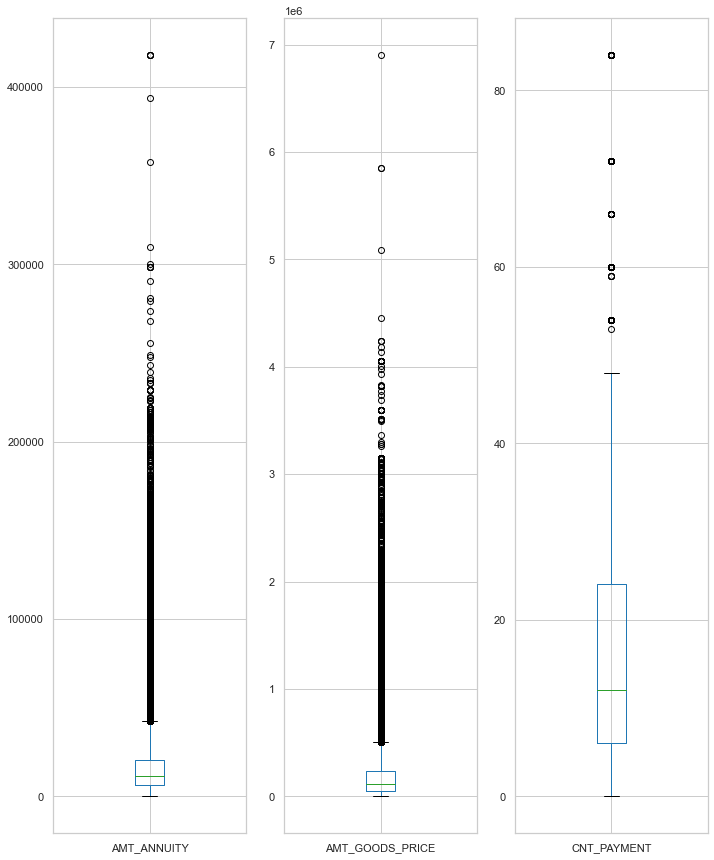

In [255]:
cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
plt.figure(figsize=(20,15))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    prev.boxplot(column = col)
plt.show()

In [256]:
prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

Merging previous application data with application data for further analysis

In [260]:
# merging previous application data with the subset of the application data frame
merged = pd.merge(prev,data, on='SK_ID_CURR', how='left')
merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,...,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_GOODS_PRICE_RANGE
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,...,No,548.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0-1L,4L-5L
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,NaN,607500.00000,THURSDAY,11,...,NaN,517.00000,NaN,NaN,NaN,NaN,NaN,NaN,0-1L,1L-2L
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,NaN,112500.00000,TUESDAY,11,...,No,301.00000,NaN,NaN,NaN,NaN,NaN,NaN,0-1L,2L-3L
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,NaN,450000.00000,MONDAY,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,NaN,337500.00000,THURSDAY,9,...,NaN,280.00000,0.00000,0.00000,0.00000,1.00000,2.00000,8.00000,0-1L,4L-5L


In [261]:
# checking for the null value column wise
merged.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE_x               0
AMT_ANNUITY_x                 372235
AMT_APPLICATION                    0
                               ...  
AMT_REQ_CREDIT_BUREAU_MON     661136
AMT_REQ_CREDIT_BUREAU_QRT     661136
AMT_REQ_CREDIT_BUREAU_YEAR    661136
AMT_INCOME_RANGE              530151
AMT_GOODS_PRICE_RANGE         531237
Length: 129, dtype: int64

In [262]:
merged.shape

(1670214, 129)

In [264]:
merged.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 129 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_PREV                    int64   
 1    SK_ID_CURR                    int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    AMT_ANNUITY_x                 float64 
 4    AMT_APPLICATION               float64 
 5    AMT_CREDIT_x                  float64 
 6    AMT_DOWN_PAYMENT              float64 
 7    AMT_GOODS_PRICE_x             float64 
 8    WEEKDAY_APPR_PROCESS_START_x  object  
 9    HOUR_APPR_PROCESS_START_x     int64   
 10   FLAG_LAST_APPL_PER_CONTRACT   object  
 11   NFLAG_LAST_APPL_IN_DAY        int64   
 12   RATE_DOWN_PAYMENT             float64 
 13   RATE_INTEREST_PRIMARY         float64 
 14   RATE_INTEREST_PRIVILEGED      float64 
 15   NAME_CASH_LOAN_PURPOSE        object  
 16   NAME_CONTRACT_STATUS          object  
 17   DAYS_DECISION            

# 7. Univariate Analysis on categorical columns

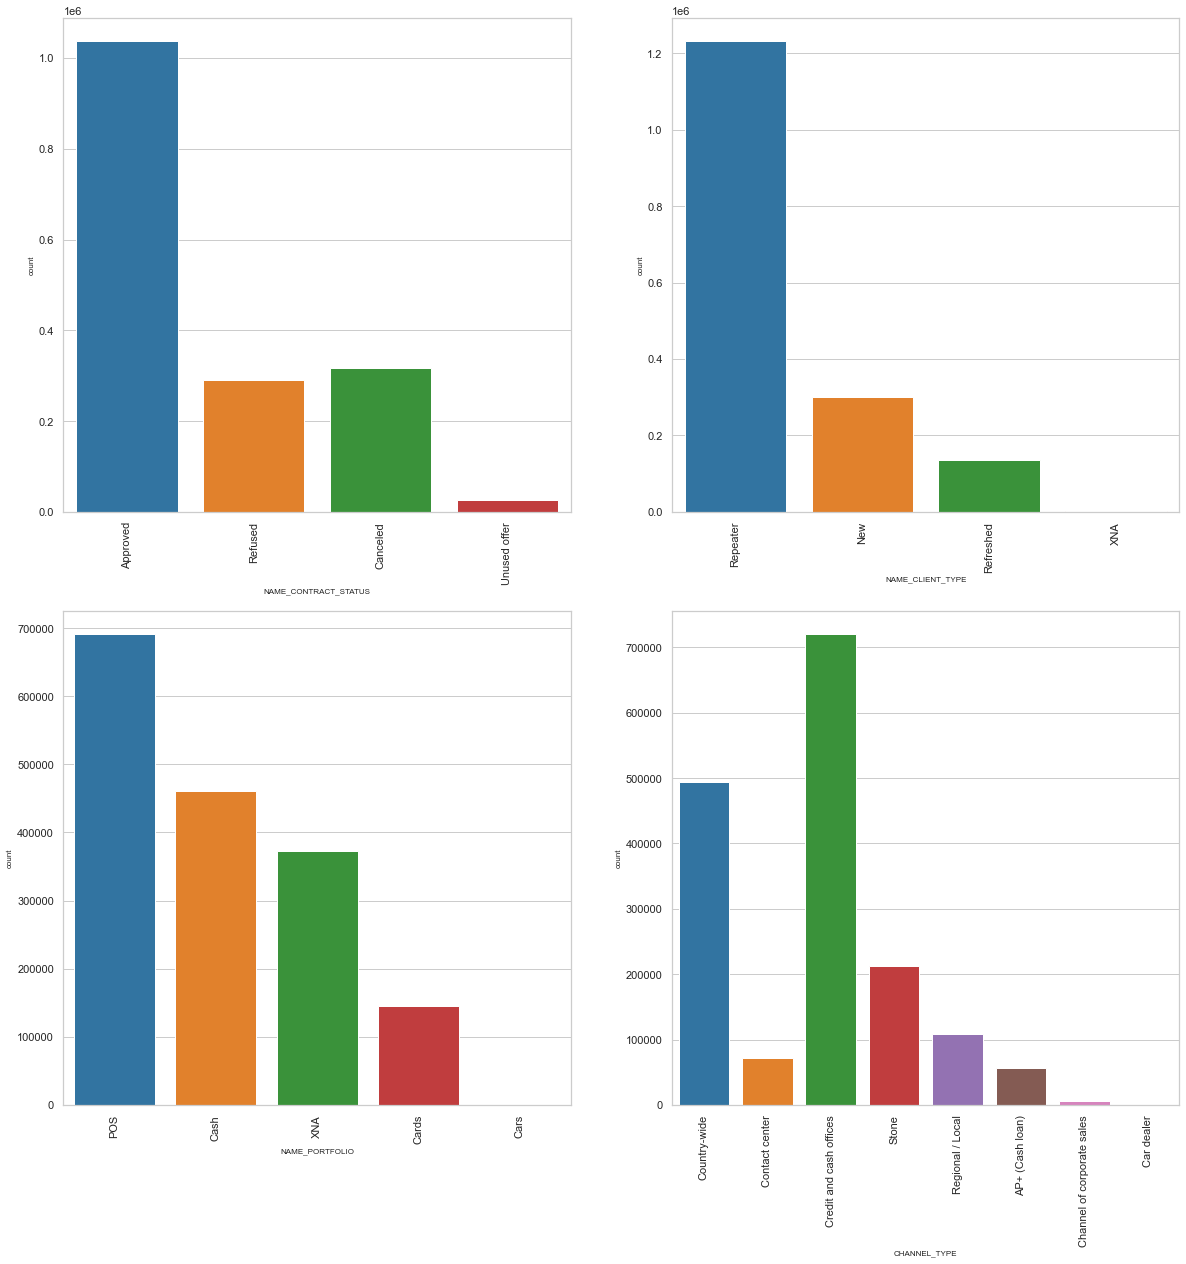

In [265]:
#plotting count plot for categorical columns
categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize = (20,20))
i = 1
for col in categorical:
    plt.subplot(2,2,i)
    sns.countplot(x = col , data = merged)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

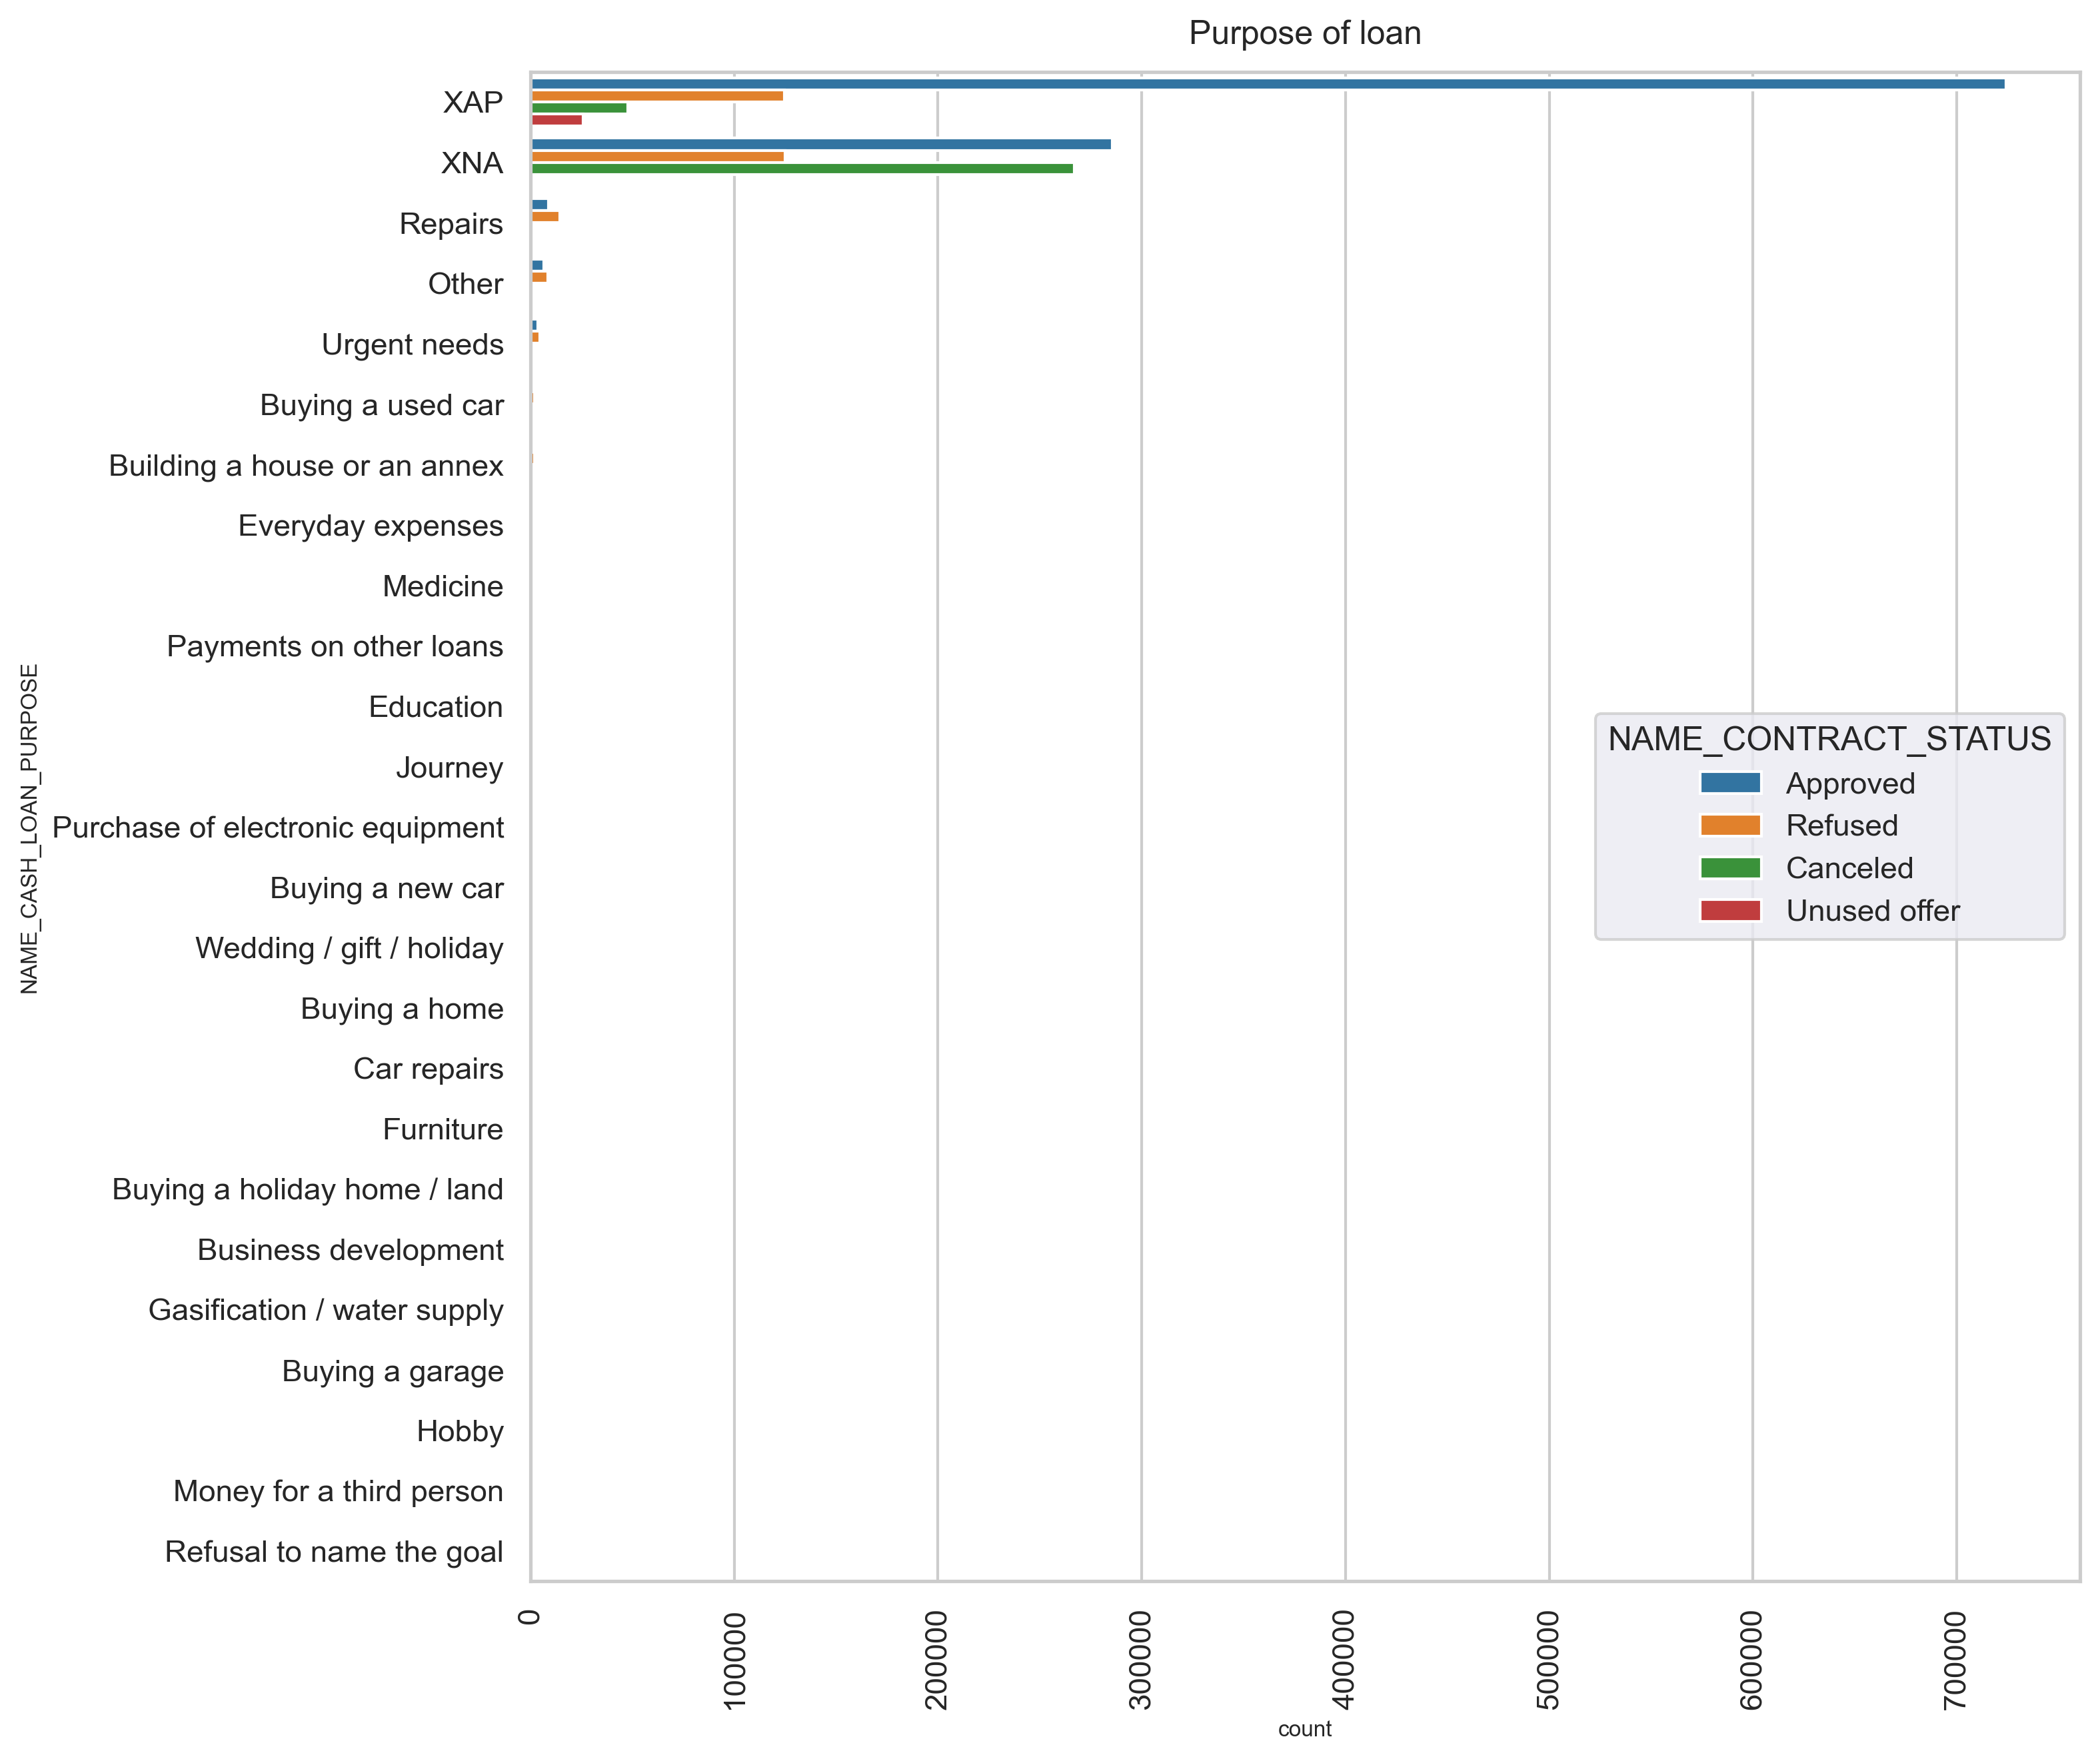

In [266]:
# Purpose of loan


plt.figure(figsize=(10,10),dpi = 300)
plt.xticks(rotation=90)
plt.title('Purpose of loan')
sns.set_style('darkgrid')
ax = sns.countplot(data = merged, y= 'NAME_CASH_LOAN_PURPOSE', order=merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 
plt.show()

Observation :
-> Most of loan rejection was from 'repairs'

# 8. Conclusion 

1. Banks must target more on contract type ‘Student’ ,’Pensioner’ and ‘Businessman’ for profitable business

2. Banks must focus less on income type ‘Working’ as it is has most number of unsuccessful payments in order to get rid
of financial loss for the organization